# 🎬 IMDb Movie Reviews Sentiment Analysis  
**Intern Name:** Barathvasan.S  
**Internship:** CodTech  
**Task:** Perform Sentiment Analysis using TF-IDF Vectorization and Logistic Regression  


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
!pip install seaborn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix






In [2]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [9]:
# Load the IMDb dataset
df = pd.read_csv("IMDB Dataset.csv")  # Ensure correct file name
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Lowercase all reviews
df['review'] = df['review'].str.lower()

# Encode sentiment to 0/1
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [11]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [17]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)



LogisticRegression(max_iter=1000)

✅ Accuracy: 0.899

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



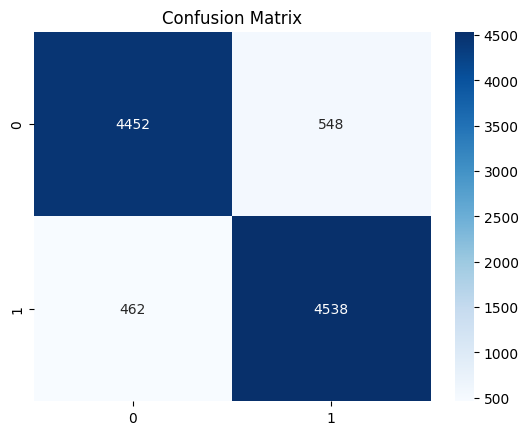

In [22]:
y_pred = model.predict(X_test_tfidf)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

# Classification Report
print("\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [23]:
sample = ["The movie was fantastic!", "I hated the ending.", "The plot was boring and slow."]
sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

for review, label in zip(sample, pred):
    print(f"Review: {review} => Sentiment: {'Positive' if label == 1 else 'Negative'}")


Review: The movie was fantastic! => Sentiment: Positive
Review: I hated the ending. => Sentiment: Negative
Review: The plot was boring and slow. => Sentiment: Negative
